# Model Dev

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [ ]:
# load clean dataset
cleaned_df= pd.read_csv('./Data/ISB-solcast-clean.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2018-12-31,12,2018-12-31,10.980000,9.070000,59.2,929.060000,167.300000,1.860000,522.2,324.600000,96.200000
1,2019-01-01,1,2019-01-01,10.570000,14.420000,62.5,925.930000,84.800000,1.520000,1.1,96.300000,96.200000
2,2019-01-02,1,2019-01-02,8.410000,14.450000,91.4,927.230000,109.400000,1.640000,275.8,259.500000,146.100000
3,2019-01-03,1,2019-01-03,9.318182,7.427273,70.0,928.790909,167.363636,1.736364,471.0,294.363636,88.272727
4,2019-01-04,1,2019-01-04,7.530000,13.650000,69.0,926.660000,31.700000,2.610000,9.1,96.700000,92.300000


In [ ]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_GHI', 'Daily_radiation'],
      dtype='object')

In [ ]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_GHI', 'Daily_radiation']]

In [ ]:
# feature engineering of time series column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year']= cleaned_df['Date'].dt.year
cleaned_df['month']= cleaned_df['Date'].dt.month
cleaned_df['day']= cleaned_df['Date'].dt.day

In [ ]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
# select features
cleaned_df= cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,12,31,10.980000,9.070000,59.2,929.060000,167.300000,1.860000,522.2,324.600000,96.200000
1,1,1,10.570000,14.420000,62.5,925.930000,84.800000,1.520000,1.1,96.300000,96.200000
2,1,2,8.410000,14.450000,91.4,927.230000,109.400000,1.640000,275.8,259.500000,146.100000
3,1,3,9.318182,7.427273,70.0,928.790909,167.363636,1.736364,471.0,294.363636,88.272727
4,1,4,7.530000,13.650000,69.0,926.660000,31.700000,2.610000,9.1,96.700000,92.300000


In [ ]:
# select target feature
X = cleaned_df.drop(['Daily_radiation'], axis=1)
y = cleaned_df['Daily_radiation']

## Model Training and Testing

In [ ]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Linear Regression

In [ ]:
# setup the pipeline steps
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
pipeline_lr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [ ]:
# evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared=False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score 0.8191972501670012
Root Mean Squared Error: 4.78
Root Mean Absolute Error: 4.26


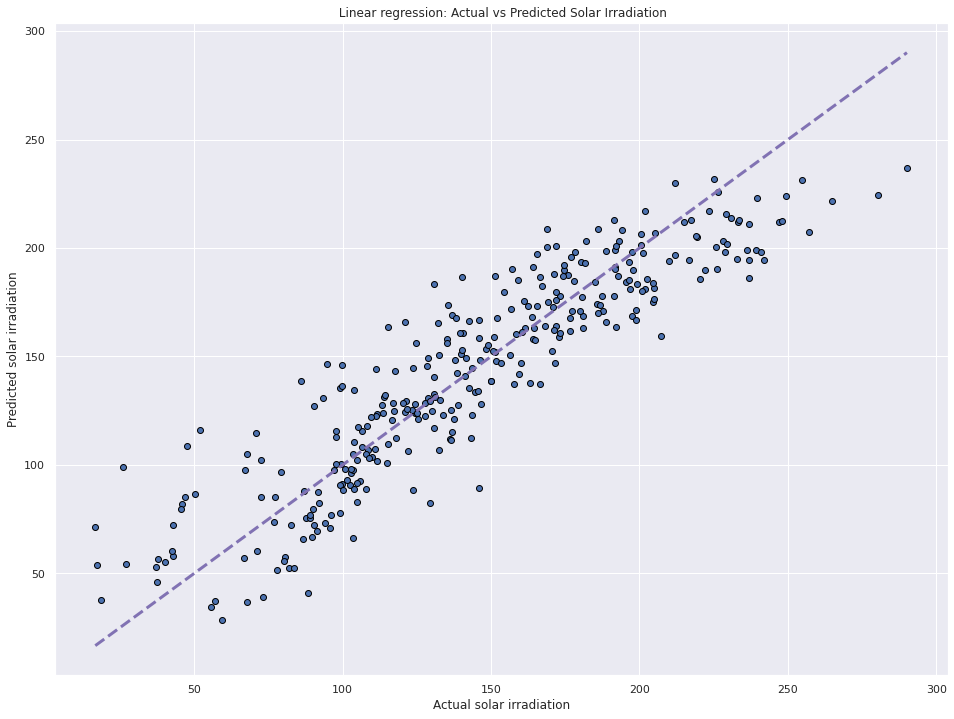

In [ ]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Actual vs Predicted Solar Irradiation")
plt.show() 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


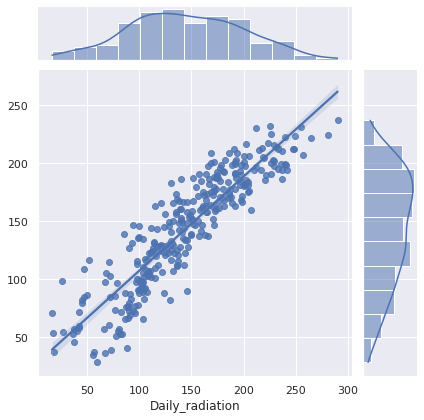

In [ ]:
sns.jointplot(y_test, y_pred_lr, kind='reg')
plt.show()

### Random Forest Regressor

In [ ]:
# setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]

# create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [ ]:
# evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score 0.9353606412969058
Root Mean Squared Error: 3.70
Root Mean Absolute Error: 3.19


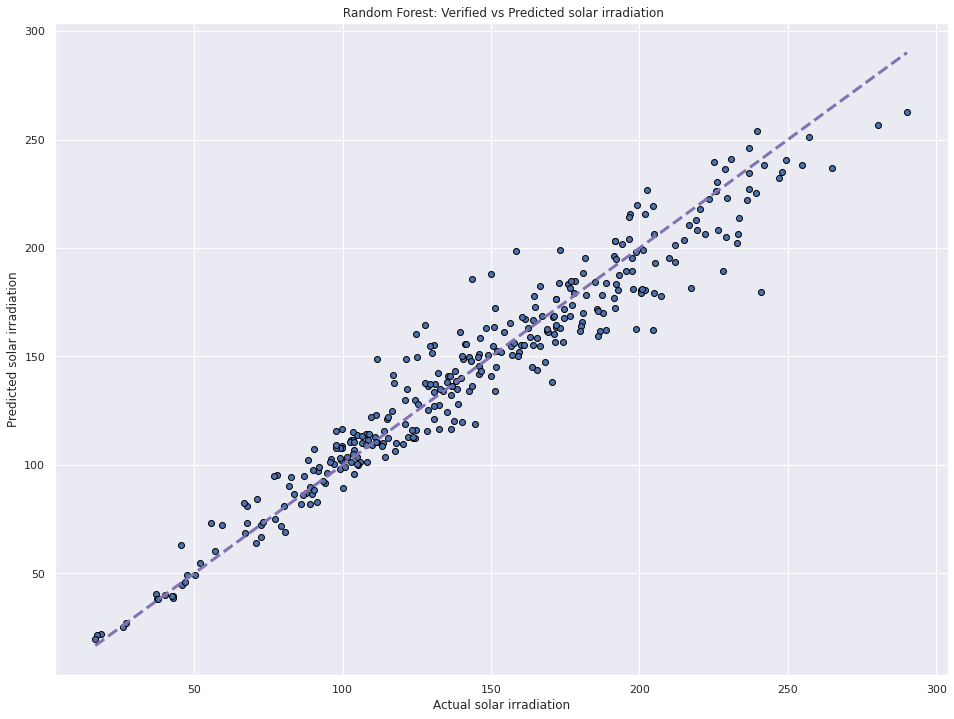

In [ ]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


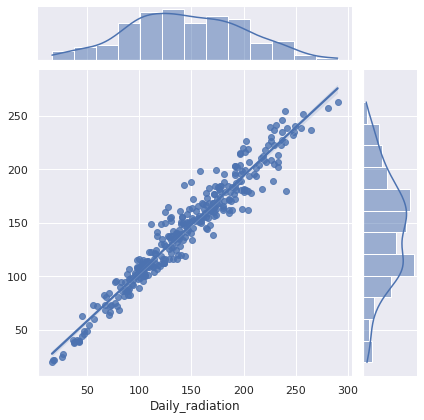

In [ ]:
sns.jointplot(y_test, y_pred_rfr, kind='reg')
plt.show()

### GradientBoosting Regressor

In [ ]:
# setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]

# create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [ ]:
# evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared=False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score 0.9345652036137702
Root Mean Squared Error: 3.71
Root Mean Absolute Error: 3.22


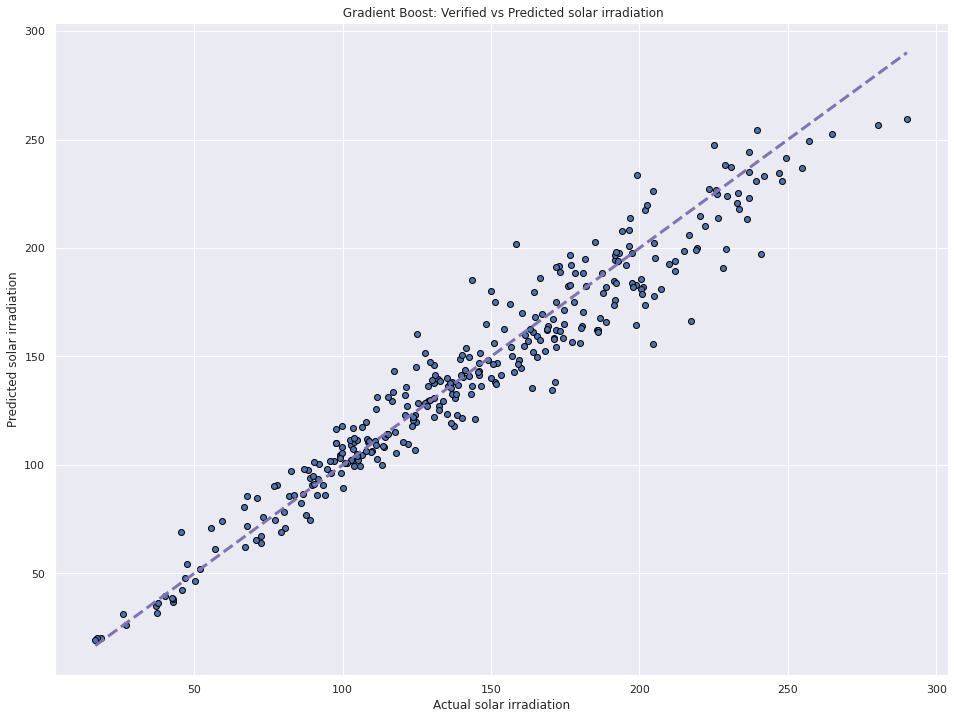

In [ ]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


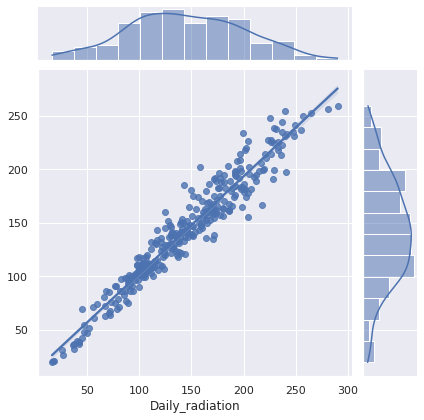

In [ ]:
sns.jointplot(y_test, y_pred_gbr, kind='reg')
plt.show()

| model                      | r2_score |
|----------------------------|----------|
| Random Forest Regressor    | 0.935    |
| GradientBoosting Regressor | 0.934    |
| Linear Regression          | 0.819    |

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=199a8a8b-03c7-4eee-a882-65187822afb3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>